In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)  # (width, height) in inches
from mzsql import *

## Create SQLite database for querying

Initially, skip any indexing/organizing and just write out as scans

In [37]:
turn_mzml_sqlite("../demo_data/180205_Poo_TruePoo_Full1.mzML", "../demo_data/180205_Poo_TruePoo_Full1_ordered_mz.sqlite", 'mz')
turn_mzml_sqlite("../demo_data/180205_Poo_TruePoo_Full1.mzML", "../demo_data/180205_Poo_TruePoo_Full1_ordered_int.sqlite", 'int')
turn_mzml_sqlite("../demo_data/180205_Poo_TruePoo_Full1.mzML", "../demo_data/180205_Poo_TruePoo_Full1_ordered_rt.sqlite", 'rt')

'../demo_data/180205_Poo_TruePoo_Full1_ordered_rt.sqlite'

In [12]:
# Call your function with ordered=True to create the index
#turn_mzml_sqlite('../demo_data/180205_Poo_TruePoo_Full1.mzML', '../demo_data/180205_Poo_TruePoo_Full1_ordered.sqlite', 'x')
import sqlite3

def test_indexing(db_file):
    conn = sqlite3.connect(db_file)
    
    # Check if the index exists
    print("Checking if the index exists...")
    index_list = conn.execute("PRAGMA index_list('MS1')").fetchall()
    
    if index_list:
        print("Indexes in MS1 table:")
        for index in index_list:
            print(f"Index: {index[1]}")  
    else:
        print("No indexes found in MS1 table.")
    
    print("\nTesting the performance of a query using rt index:")
    query = "SELECT * FROM MS1 WHERE mz BETWEEN 200 AND 300"
    cursor = conn.execute(query)
    rows = cursor.fetchall()
    print(f"Found {len(rows)} rows.")
    
    conn.close()

# Call the function with the path to your SQLite database file
test_indexing('../demo_data/180205_Poo_TruePoo_Full1_ordered.sqlite')


Checking if the index exists...
Indexes in MS1 table:
Index: idx_rt

Testing the performance of a query using rt index:
Found 338116 rows.


## Query the database

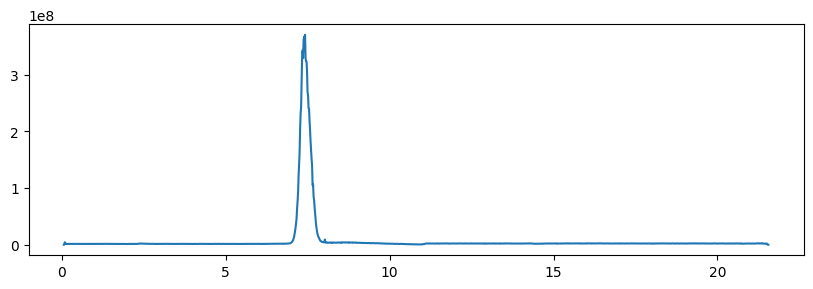

In [26]:
chrom_data = get_chrom_sqlite("../demo_data/180205_Poo_TruePoo_Full1_ordered.sqlite", 118.0865, 10)
plt.plot(chrom_data["rt"], chrom_data["int"])

<StemContainer object of 3 artists>

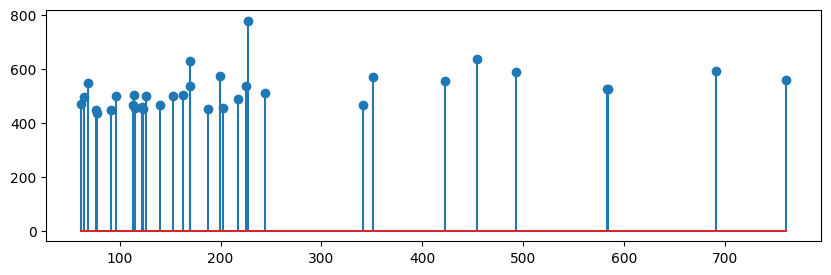

In [27]:
spec_data = get_spec_sqlite("../demo_data/180205_Poo_TruePoo_Full1_ordered.sqlite", 1)
plt.stem(spec_data["mz"], spec_data["int"])

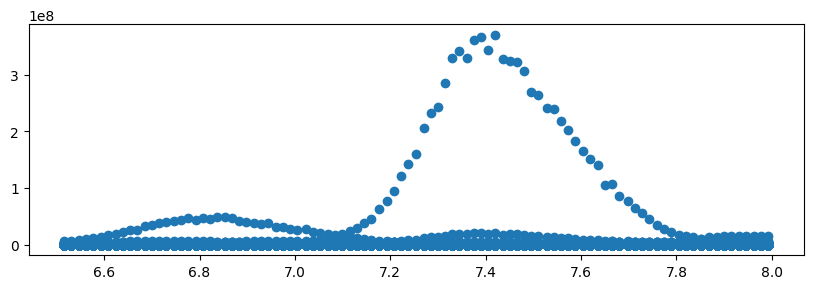

In [15]:
rtrange_data = get_rtrange_sqlite('../demo_data/180205_Poo_TruePoo_Full1.sqlite', 6.5, 8)
plt.scatter(rtrange_data["rt"], rtrange_data["int"])

## Comparison to mzML methods

In [16]:
import timeit

In [22]:
turn_mzml_sqlite("../demo_data/180205_Poo_TruePoo_Full1.mzML", "../demo_data/180205_Poo_TruePoo_Full1_ordered.sqlite", 'rt')

'../demo_data/180205_Poo_TruePoo_Full1_ordered.sqlite'

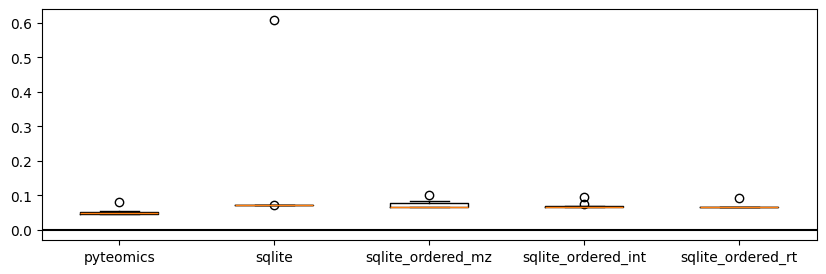

In [39]:
pyteomics_spec = timeit.repeat('get_spec_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1.mzML", 1)', globals=globals(), number=1, repeat=10)
sqlite_spec = timeit.repeat('get_spec_sqlite("../demo_data/180205_Poo_TruePoo_Full1.sqlite", 1)', globals=globals(), number=1, repeat=10)
sqlite_spec_ordered_mz = timeit.repeat('get_spec_sqlite("../demo_data/180205_Poo_TruePoo_Full1_ordered_mz.sqlite", 1)', globals=globals(), number=1, repeat=10)
sqlite_spec_ordered_int = timeit.repeat('get_spec_sqlite("../demo_data/180205_Poo_TruePoo_Full1_ordered_int.sqlite", 1)', globals=globals(), number=1, repeat=10)
sqlite_spec_ordered_rt = timeit.repeat('get_spec_sqlite("../demo_data/180205_Poo_TruePoo_Full1_ordered_rt.sqlite", 1)', globals=globals(), number=1, repeat=10)
plt.boxplot([pyteomics_spec, sqlite_spec, sqlite_spec_ordered_mz, sqlite_spec_ordered_int, sqlite_spec_ordered_rt], tick_labels=["pyteomics", "sqlite", "sqlite_ordered_mz","sqlite_ordered_int","sqlite_ordered_rt"])
plt.axhline(y=0, color="k")
plt.show()

In [ ]:
turn_mzml_sqlite("../demo_data/180205_Poo_TruePoo_Full1.mzML", "../demo_data/180205_Poo_TruePoo_Full1_ordered.sqlite", 'rt')

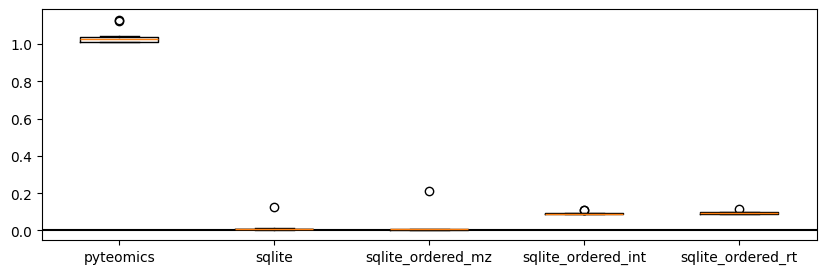

In [40]:
pyteomics_chrom = timeit.repeat('get_chrom_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1.mzML", 118.0865, 10)', globals=globals(), number=1, repeat=10)
sqlite_chrom = timeit.repeat('get_chrom_sqlite("../demo_data/180205_Poo_TruePoo_Full1.sqlite", 118.0865, 10)', globals=globals(), number=1, repeat=10)
sqlite_chrom_ordered_mz = timeit.repeat('get_chrom_sqlite("../demo_data/180205_Poo_TruePoo_Full1_ordered_mz.sqlite", 118.0865, 10)', globals=globals(), number=1, repeat=10)
sqlite_chrom_ordered_int = timeit.repeat('get_chrom_sqlite("../demo_data/180205_Poo_TruePoo_Full1_ordered_int.sqlite", 118.0865, 10)', globals=globals(), number=1, repeat=10)
sqlite_chrom_ordered_rt = timeit.repeat('get_chrom_sqlite("../demo_data/180205_Poo_TruePoo_Full1_ordered_rt.sqlite", 118.0865, 10)', globals=globals(), number=1, repeat=10)
plt.boxplot([pyteomics_chrom, sqlite_chrom, sqlite_chrom_ordered_mz, sqlite_chrom_ordered_int, sqlite_chrom_ordered_rt], 
            tick_labels=["pyteomics", "sqlite", "sqlite_ordered_mz", "sqlite_ordered_int", "sqlite_ordered_rt"])
plt.axhline(y=0, color="k")
plt.show()

In [ ]:
turn_mzml_sqlite("../demo_data/180205_Poo_TruePoo_Full1.mzML", "../demo_data/180205_Poo_TruePoo_Full1_ordered.sqlite", 'rt')

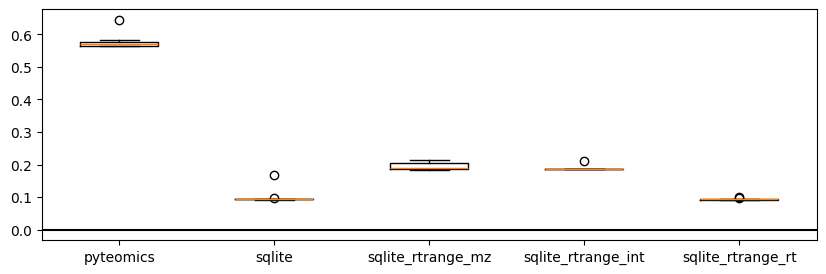

In [42]:
pyteomics_rtrange = timeit.repeat('get_rtrange_mzml_pyteomics("../demo_data/180205_Poo_TruePoo_Full1.mzML", 6.5, 8)', globals=globals(), number=1, repeat=10)
sqlite_rtrange = timeit.repeat('get_rtrange_sqlite("../demo_data/180205_Poo_TruePoo_Full1.sqlite", 6.5, 8)', globals=globals(), number=1, repeat=10)
sqlite_rtrange_ordered_mz = timeit.repeat('get_rtrange_sqlite("../demo_data/180205_Poo_TruePoo_Full1_ordered_mz.sqlite", 6.5, 8)', globals=globals(), number=1, repeat=10)
sqlite_rtrange_ordered_int = timeit.repeat('get_rtrange_sqlite("../demo_data/180205_Poo_TruePoo_Full1_ordered_int.sqlite", 6.5, 8)', globals=globals(), number=1, repeat=10)
sqlite_rtrange_ordered_rt = timeit.repeat('get_rtrange_sqlite("../demo_data/180205_Poo_TruePoo_Full1_ordered_rt.sqlite", 6.5, 8)', globals=globals(), number=1, repeat=10)
plt.boxplot([pyteomics_rtrange, sqlite_rtrange, sqlite_rtrange_ordered_mz, sqlite_rtrange_ordered_int, sqlite_rtrange_ordered_rt], 
            tick_labels=["pyteomics", "sqlite", "sqlite_rtrange_mz", "sqlite_rtrange_int", "sqlite_rtrange_rt"])
plt.axhline(y=0, color="k")
plt.show()